**LEVEL_2 - TASK_3**

**FRAUD DETECTION**

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 200)
sns.set_style('whitegrid')
%matplotlib inline

In [50]:
df = pd.read_csv('creditcard.csv')

In [51]:
print("Shape:", df.shape)

Shape: (284807, 31)


In [52]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [53]:
print("Columns:", df.columns.tolist())

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [54]:
print("\nDtypes:")
print(df.dtypes)


Dtypes:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


**DATA CLEANING AND ANOMALY DETECTION**

In [55]:
print("\nMissing values (top):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Missing values (top):
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
dtype: int64


In [56]:
print("\nBasic numeric description:")
display(df.describe().T)


Basic numeric description:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [57]:
print("\nClass Distribution (0 = Normal, 1 = Fraud):")
print(df["Class"].value_counts())


Class Distribution (0 = Normal, 1 = Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


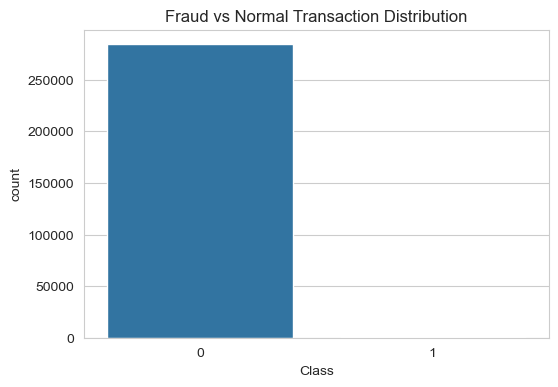

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transaction Distribution")
plt.show()

FEATURES AND TARGET

In [59]:
X = df.drop(columns=["Class"])
y = df["Class"]

ISOLATION FOREST

In [60]:
state = 1  
isolation_forest = IsolationForest(
    max_samples=len(X),
    contamination=float(len(df[df["Class"] == 1]) / len(df)),
    random_state=state
)
isolation_forest.fit(X)
y_pred_if = isolation_forest.predict(X)

In [61]:
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]

LOCAL OUTLIER FACTOR

In [62]:
from sklearn.ensemble import IsolationForest
contamination_ratio = float(len(df[df["Class"] == 1]) / len(df))
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=contamination_ratio,
    random_state=42,
    n_jobs=-1  
)
y_pred_iso = iso_forest.fit_predict(X)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

EVALUATING MODELS

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print("\n--- Isolation Forest Results ---")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if, digits=4))


--- Isolation Forest Results ---
[[283991    324]
 [   324    168]]
              precision    recall  f1-score   support

           0     0.9989    0.9989    0.9989    284315
           1     0.3415    0.3415    0.3415       492

    accuracy                         0.9977    284807
   macro avg     0.6702    0.6702    0.6702    284807
weighted avg     0.9977    0.9977    0.9977    284807



In [64]:
print("\n--- Local Outlier Factor Results ---")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso, digits=4))


--- Local Outlier Factor Results ---
[[283949    366]
 [   366    126]]
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2561    0.2561    0.2561       492

    accuracy                         0.9974    284807
   macro avg     0.6274    0.6274    0.6274    284807
weighted avg     0.9974    0.9974    0.9974    284807



VISUALIZATION

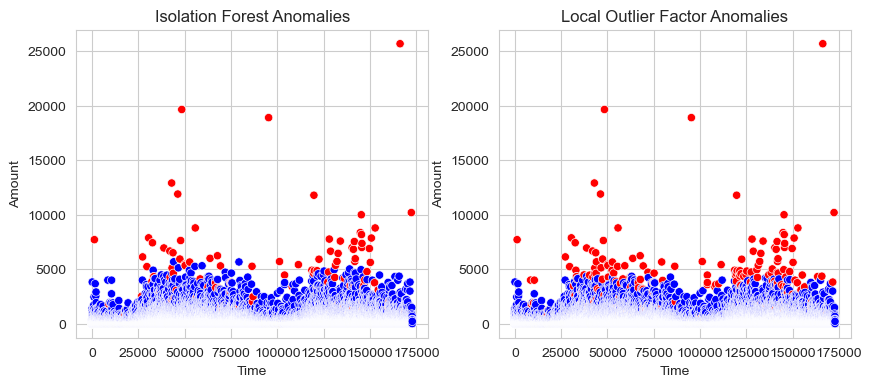

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x='Time', y='Amount', hue=y_pred_if, palette=['blue','red'], data=df, legend=False)
plt.title("Isolation Forest Anomalies")
plt.subplot(1,2,2)
sns.scatterplot(x='Time', y='Amount', hue=y_pred_iso, palette=['blue','red'], data=df, legend=False)
plt.title("Local Outlier Factor Anomalies")
plt.show()

**MACHINE LEARNING MODELS**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (227845, 30)
Testing Data Shape: (56962, 30)


In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

In [70]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("\n=== Logistic Regression Results ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, digits=4))


=== Logistic Regression Results ===
[[56851    13]
 [   36    62]]
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8267    0.6327    0.7168        98

    accuracy                         0.9991     56962
   macro avg     0.9130    0.8162    0.8582     56962
weighted avg     0.9991    0.9991    0.9991     56962



DECISION TREE CLASSIFIER

In [71]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("\n=== Decision Tree Results ===")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, digits=4))


=== Decision Tree Results ===
[[56855     9]
 [   22    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8941    0.7755    0.8306        98

    accuracy                         0.9995     56962
   macro avg     0.9469    0.8877    0.9152     56962
weighted avg     0.9994    0.9995    0.9994     56962



MLP CLASSIFIER

In [72]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    max_iter=50,
    random_state=42,
)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
print("\n=== Neural Network (MLP) Results ===")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, digits=4))


=== Neural Network (MLP) Results ===
[[56851    13]
 [   19    79]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8587    0.8061    0.8316        98

    accuracy                         0.9994     56962
   macro avg     0.9292    0.9029    0.9156     56962
weighted avg     0.9994    0.9994    0.9994     56962



ROU- AUC CURVE COMPARISION

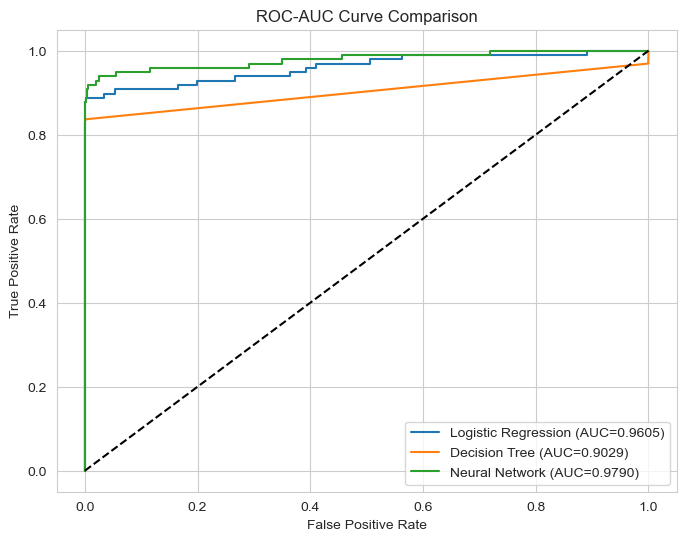

In [73]:
y_pred_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_dt = dt_clf.predict_proba(X_test)[:, 1]
y_pred_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob_dt)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob_mlp)
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_pred_prob_log):.4f})")
plt.plot(fpr2, tpr2, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_pred_prob_dt):.4f})")
plt.plot(fpr3, tpr3, label=f"Neural Network (AUC={roc_auc_score(y_test, y_pred_prob_mlp):.4f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**FEATURE ENGINEERING**

In [74]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+

CHECK CORRELATIONS

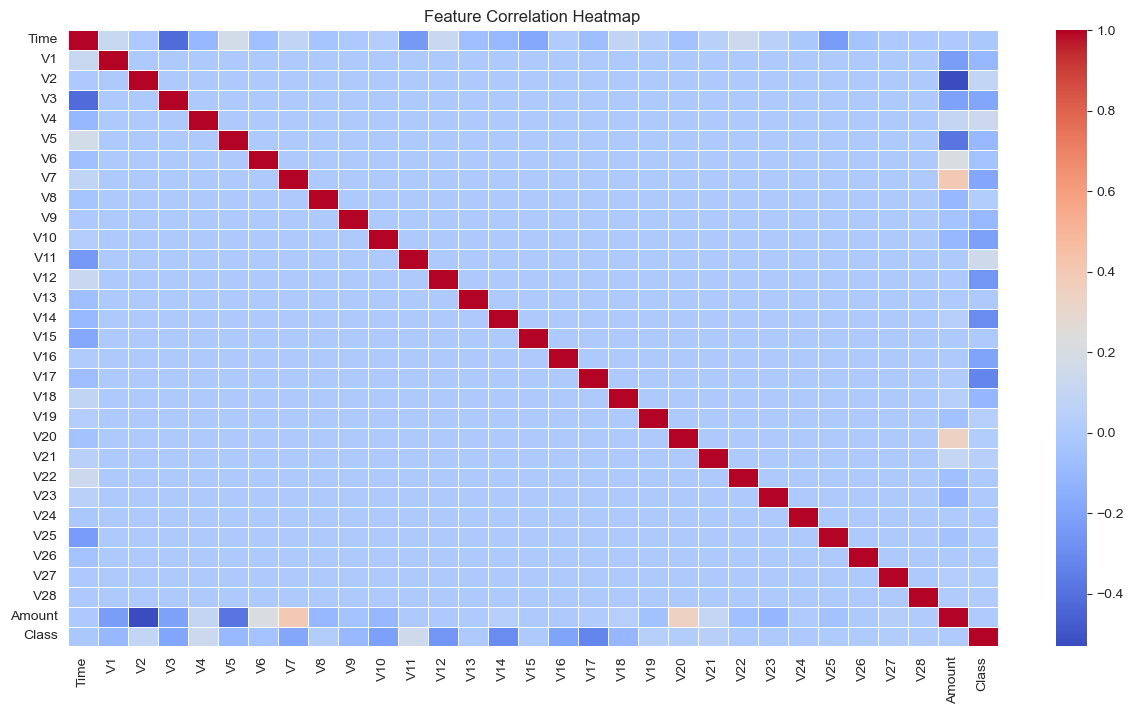

In [75]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

DROPPING FEATURES WITH NEAR-ZERO CORRELATION TO TARGET

In [76]:
corr_with_target = corr["Class"].sort_values(ascending=False)
print("\nCorrelation of features with 'Class':\n", corr_with_target)


Correlation of features with 'Class':
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [77]:
top_features = corr_with_target[abs(corr_with_target) > 0.05].index.tolist()
print("\nSelected Features based on correlation:", top_features)


Selected Features based on correlation: ['Class', 'V11', 'V4', 'V2', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']


In [78]:
df_selected = df[top_features]
if "Class" not in df_selected.columns:
    df_selected["Class"] = df["Class"]

HANDLING SKEWED FEATURES

In [79]:
import numpy as np
f_selected = df.copy()
f_selected["Log_Amount"] = np.log1p(f_selected["Amount"])
f_selected.drop(columns=["Amount"], inplace=True, errors='ignore')

FEATURE SCALING

In [80]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected.drop(columns=["Class"]))
df_scaled = pd.DataFrame(scaled_features, columns=df_selected.drop(columns=["Class"]).columns)
df_scaled["Class"] = df_selected["Class"]
print("\nScaled dataset shape:", df_scaled.shape)


Scaled dataset shape: (284807, 15)


ANOVA F-TEST

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]
k = min(15, X.shape[1]) 
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"\nTop {k} Selected Features using ANOVA test:")
print(selected_features)


Top 14 Selected Features using ANOVA test:
['V11', 'V4', 'V2', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']


Numeric columns available in df_scaled: ['V11', 'V4', 'V2', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17', 'Class']


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


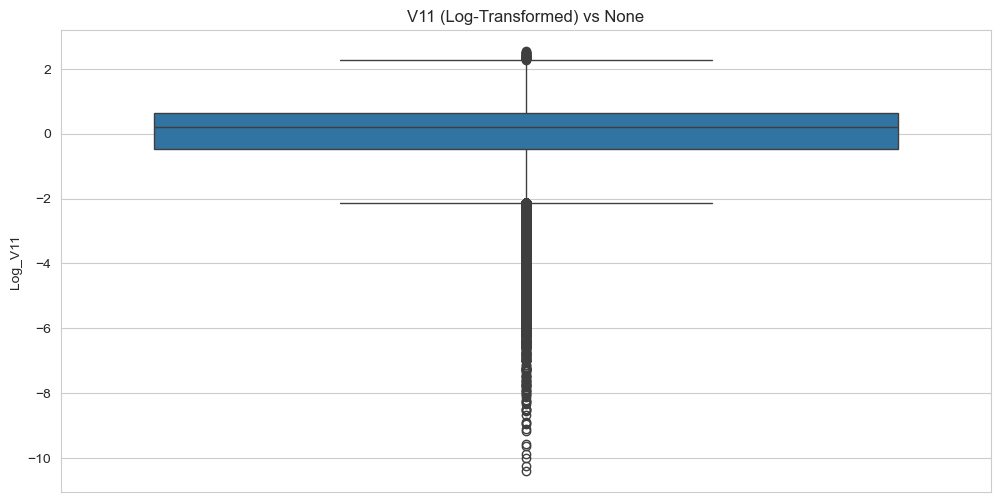

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df_scaled.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns available in df_scaled:", numeric_cols)

if numeric_cols:
    numeric_col = numeric_cols[0]
    df_scaled[f"Log_{numeric_col}"] = np.log1p(df_scaled[numeric_col])
    categorical_cols = df_scaled.select_dtypes(exclude=np.number).columns.tolist()
    if categorical_cols:
        cat_col = categorical_cols[0]
    else:
        cat_col = None

    plt.figure(figsize=(12,6))
    sns.boxplot(x=cat_col, y=f"Log_{numeric_col}", data=df_scaled)
    plt.title(f"{numeric_col} (Log-Transformed) vs {cat_col}")
    plt.show()
else:
    print("No numeric columns found in df_scaled to plot.")


VISUALIZATION

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [85]:
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
print("✅ Model trained and ready for real-time predictions!\n")

✅ Model trained and ready for real-time predictions!



In [88]:
stream_df = X_test.copy()
stream_df["Actual_Class"] = y_test.values
stream_df = stream_df.reset_index(drop=True)
results = []

In [ ]:
print("🚀 Starting real-time monitoring simulation...\n")

feature_cols = [col for col in df_scaled.columns if col != "Class"]
X = df_scaled[feature_cols]
y = df_scaled["Class"]

expected_features = scaler.feature_names_in_ 

for i in range(len(stream_df)):
    transaction = stream_df.iloc[i:i+1].copy()

    if "Actual_Class" in transaction.columns:
        actual_class = transaction["Actual_Class"].values[0]
        transaction = transaction.drop(columns=["Actual_Class"])
    else:
        actual_class = None
    transaction = transaction.reindex(columns=expected_features, fill_value=0)
    transaction_scaled = scaler.transform(transaction)

    pred_prob = model.predict_proba(transaction_scaled)[0][1]
    pred_class = int(pred_prob > 0.5)

    print(f"Transaction {i+1}: Actual={actual_class}, Predicted={pred_class}, Prob={pred_prob:.4f}")


🚀 Starting real-time monitoring simulation...

Transaction 1: Actual=0, Predicted=0, Prob=0.0001
Transaction 2: Actual=0, Predicted=0, Prob=0.0000
Transaction 3: Actual=0, Predicted=0, Prob=0.0000
Transaction 4: Actual=0, Predicted=0, Prob=0.0001
Transaction 5: Actual=0, Predicted=0, Prob=0.0077
Transaction 6: Actual=0, Predicted=0, Prob=0.0002
Transaction 7: Actual=0, Predicted=0, Prob=0.0001
Transaction 8: Actual=0, Predicted=0, Prob=0.0001
Transaction 9: Actual=0, Predicted=0, Prob=0.0008
Transaction 10: Actual=0, Predicted=0, Prob=0.0000
Transaction 11: Actual=0, Predicted=0, Prob=0.0010
Transaction 12: Actual=0, Predicted=0, Prob=0.0001
Transaction 13: Actual=0, Predicted=0, Prob=0.0000
Transaction 14: Actual=0, Predicted=0, Prob=0.0001
Transaction 15: Actual=0, Predicted=0, Prob=0.0001
Transaction 16: Actual=0, Predicted=0, Prob=0.0002
Transaction 17: Actual=0, Predicted=0, Prob=0.0000
Transaction 18: Actual=0, Predicted=0, Prob=0.0000
Transaction 19: Actual=0, Predicted=0, Prob=

In [ ]:
import pandas as pd
import numpy as np
import time
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from IPython.display import clear_output
df = pd.read_csv("processed_fraud_data.csv")
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
print("✅ Model trained and ready for real-time predictions!\n")
stream_df = X_test.copy()
stream_df["Actual_Class"] = y_test.values
stream_df = stream_df.reset_index(drop=True)
results = []
print("🚀 Starting real-time monitoring simulation...\n")
for i in range(0, len(stream_df)):
    transaction = stream_df.iloc[i:i+1].drop(columns=["Actual_Class"])
    actual_class = stream_df.iloc[i]["Actual_Class"]
    transaction_scaled = scaler.transform(transaction)
    pred_prob = model.predict_proba(transaction_scaled)[0][1]
    pred_class = int(pred_prob > 0.5)
    results.append({
        "Transaction_ID": i,
        "Predicted_Class": pred_class,
        "Fraud_Probability": pred_prob,
        "Actual_Class": actual_class
    })
    if i % 50 == 0:  
        clear_output(wait=True)
        temp_df = pd.DataFrame(results)
        fraud_count = temp_df["Predicted_Class"].sum()
        legit_count = len(temp_df) - fraud_count
        print(f"Processed {i+1}/{len(stream_df)} transactions")
        print(f"⚠️ Detected {fraud_count} potential frauds")
        plt.figure(figsize=(8,4))
        plt.bar(["Legit", "Fraud"], [legit_count, fraud_count], color=["green","red"])
        plt.title("Real-Time Fraud Detection Monitor")
        plt.xlabel("Transaction Type")
        plt.ylabel("Count")
        plt.show()
    time.sleep(0.05)
print("\n✅ Real-time simulation completed!")
results_df = pd.DataFrame(results)
results_df.to_csv("realtime_fraud_predictions.csv", index=False)
print("\n📁 Saved results as 'realtime_fraud_predictions.csv'")